In [66]:
from CPlantBox_PiafMunch import *

In [67]:
name = "PMA2018_new.xml"
time =10
plant = pb.Plant()
plant.openXML("../../modelparameter/plant/" + name)
seeds = plant.getOrganRandomParameter(pb.OrganTypes.seed)
roots = plant.getOrganRandomParameter(pb.OrganTypes.root)
stems = plant.getOrganRandomParameter(pb.OrganTypes.stem)
leafs = plant.getOrganRandomParameter(pb.OrganTypes.leaf)
plant.initialize(True)

In [68]:
plant.simulate(time)
plant.write("{}.vtp".format(str(name)))
dict_all  = convert( plant )
piafmunch_outputname = name +".ini"

write_PiafMunch_parameter(dict_all['node_connection'], dict_all['nodes_organtype'], dict_all['nodes_r_st'], dict_all['unq_cnt'], piafmunch_outputname)


output successful


In [19]:
ana = pb.SegmentAnalyser(plant)
ana.write("{}.vtp".format(str(name)))

In [20]:
nodes_organtype = dict_all['nodes_organtype']
N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==4)|(nodes_organtype[:,1] ==3)  ) & (nodes_organtype[:,2] ==1 )]

In [21]:

nodes_cor = python_nodes(plant)

In [31]:
for i in range(len(N1R_node)):
    print(nodes_cor[int(N1R_node[i][0])])

[ 1.20000000e+01  2.00000000e+00  1.00000000e+00  1.84417089e-02
  1.95979437e-03 -4.79182978e-02]
[ 2.50000000e+01  2.00000000e+00  1.00000000e+00 -8.83940538e-03
  8.51565727e-03 -5.34214789e-02]
[ 3.80000000e+01  2.00000000e+00  1.00000000e+00  1.23038930e-02
 -9.05837092e-03 -5.53902038e-02]
[ 5.00000000e+01  2.00000000e+00  1.00000000e+00 -3.26256713e-03
  4.98892015e-03 -6.19182466e-02]
[ 6.20000000e+01  2.00000000e+00  1.00000000e+00 -1.71935650e-02
 -1.67282352e-02 -5.05185532e-02]
[ 7.40000000e+01  2.00000000e+00  1.00000000e+00  9.34355603e-03
 -1.67012812e-02 -5.70142594e-02]
[ 8.50000000e+01  2.00000000e+00  1.00000000e+00 -2.89288489e-03
  8.99666636e-03 -6.55793801e-02]
[ 9.60000000e+01  2.00000000e+00  1.00000000e+00 -2.58882530e-03
  9.40274429e-03 -6.49089119e-02]
[ 1.06000000e+02  2.00000000e+00  1.00000000e+00 -1.04402631e-02
 -1.77218194e-02 -6.39732441e-02]
[ 1.15000000e+02  2.00000000e+00  1.00000000e+00 -2.94737652e-04
 -1.77924721e-02 -6.86564935e-02]
[ 1.230000

In [19]:

N1R_node[i][0]

12.0

In [74]:
os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe {} -noGUI -q'.format(piafmunch_outputname))

256

In [75]:
now = datetime.datetime.now()
os.system('mv ./{}_{}-{:02}-{:02}*output.txt  ./{}_output.txt'.format(name, now.year ,now.month, now.day,name ) )


0

In [12]:
name

'PMA2018_new.xml'

In [76]:
node_connection = dict_all['node_connection']
path = name+'_output.txt'
#path = 'PiafMunch2_PMA1_output.txt'
output = pd.read_table(path,sep='\t',header=1)

x = np.array(output.iloc[:,0])
##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])




/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 651 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 501 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 951 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 751 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1601 we can find Q_ST (mmol)[ 1]
the end is JS_ST (mmol / h)[ 1]
at Nr. 151 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1801 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[50] 
at Nr. 1701 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[50]
at Nr. 1651 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[50]


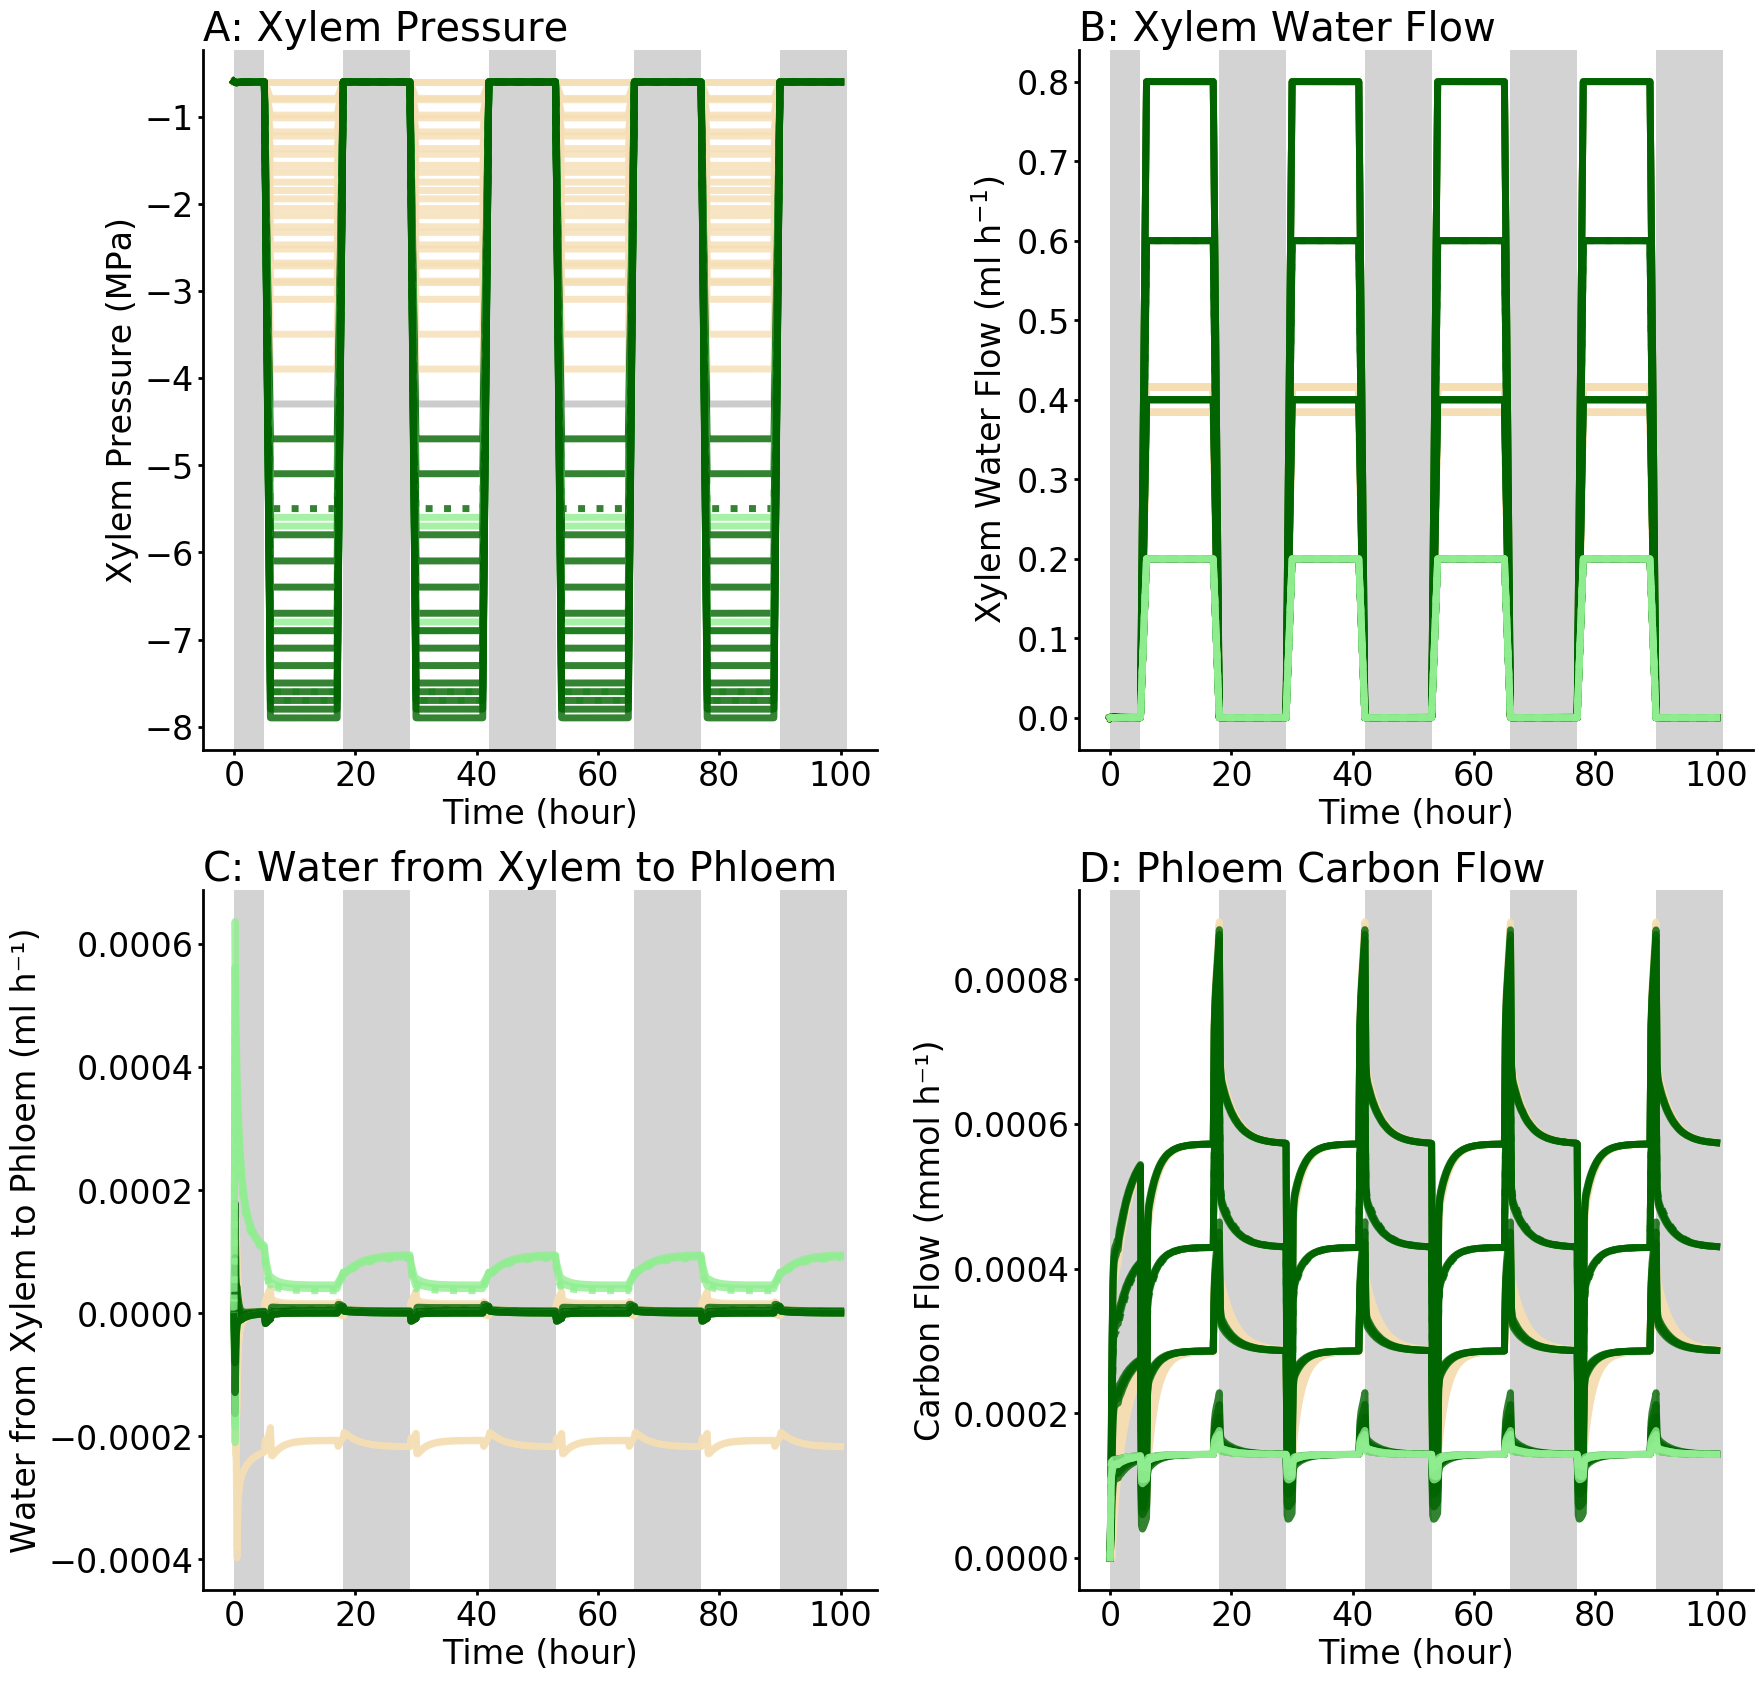

In [77]:
nodes_organtype = dict_all['nodes_organtype']
plt.style.use('default')

def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem\n between\n two\n leaves')
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})
import numpy as np
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)


def organ_color(int):
    if int == 34 or 40 or 51 or 46: #int is source 
        return 'lightgreen'
    elif int == 10: #int root
        return 'wheat'
    elif int == 17 or 29:
        return 'darkgreen'
    else:
        return 'darkgreen'
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 3)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 

def organ_color_n(int):
    if nodes_organtype[int,1] == 4: #int is source 
        return 'lightgreen'
    elif nodes_organtype[int,1] == 2: #int is sink
        return 'wheat'
    elif nodes_organtype[int,1] == 3:
        return 'darkgreen'
    else:
        return 'silver'    

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'   

######################################### First Figure ################################################
ax = plt.subplot(221)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Pressure (MPa)", color='black')
plt.title("A: Xylem Pressure", color='black' ,loc="left")
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in P_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color_n(i),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')
add_day_night()

######################################### Second Figure ################################################
ax = plt.subplot(222)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
plt.title("B: Xylem Water Flow",loc="left")
for i in range(len(node_connection)-1):
    ax.plot(x,[pt[i] for pt in JW_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
#ax.set_ylim(0, 0.0005)
add_day_night()


######################################### Third Figure ################################################
ax = plt.subplot(223)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)


plt.xlabel("Time (hour)")

plt.ylabel('Water from Xylem to Phloem (ml h⁻¹)', color='black')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration')


plt.title('C: Water from Xylem to Phloem', color='black', loc="left")  
for i in range(len(np.transpose(JW_Trsv))-1):
        ax.plot(x,[pt[i] for pt in JW_Trsv], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8, ls = line_style(node_connection[i,0]))

add_day_night()

######################################### Fourth Figure ################################################
ax = plt.subplot(224)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel('Carbon Flow (mmol h⁻¹)', color='black')
plt.title('D: Phloem Carbon Flow', color='black',loc="left")  
for i in range(len(np.transpose(JS_ST))):
        ax.plot(x,[pt[i] for pt in JS_ST], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8, ls = line_style(node_connection[i,0]))
add_day_night()
plt.show()
f.savefig("diural.png", bbox_inches='tight')

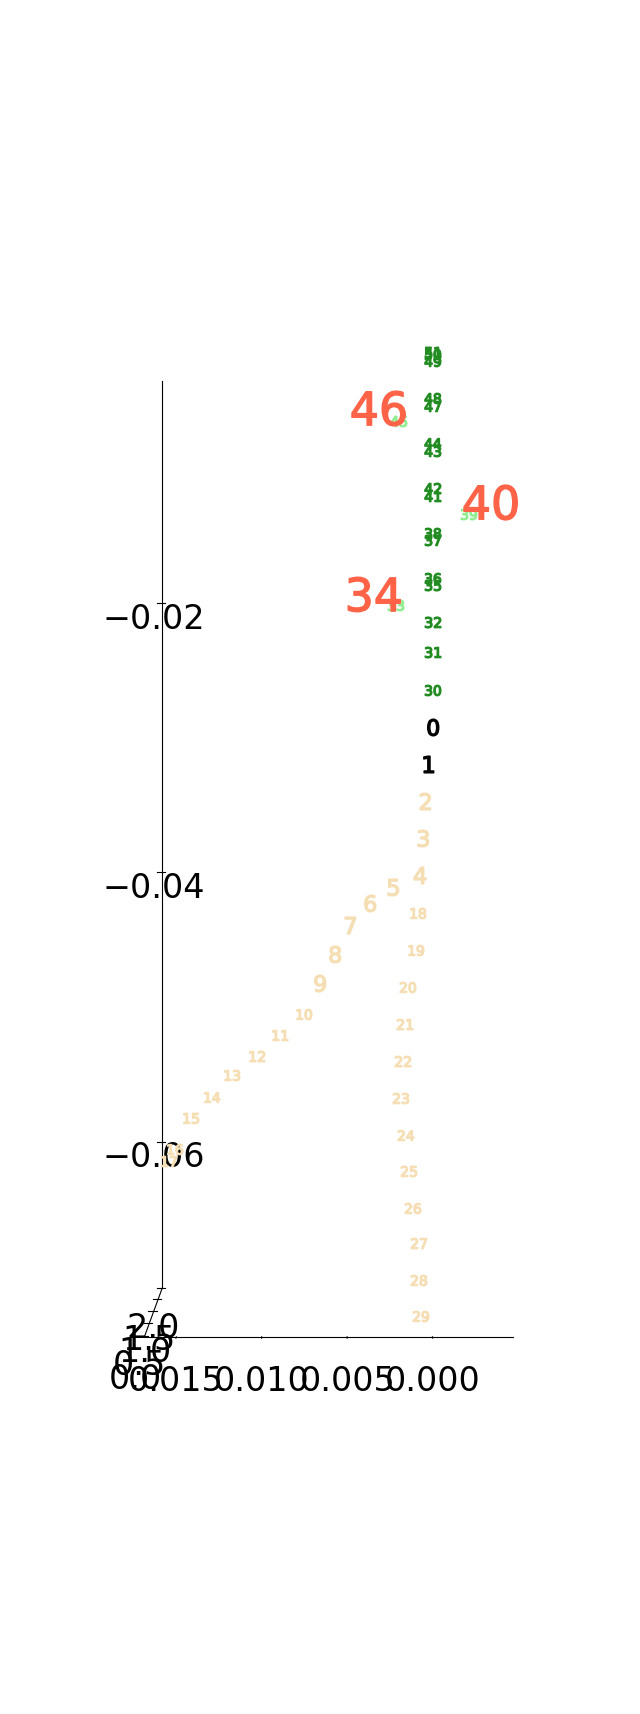

In [73]:
from mpl_toolkits.mplot3d import axes3d
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'forestgreen'
    else:
        return 'black'
    
nodes_cor = python_nodes(plant)

plt.rcParams['figure.figsize'] = [8, 22]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt





fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes_cor[:,3]
y =nodes_cor[:,4]
z =nodes_cor[:,5]

# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)

for i in range(len(nodes_cor)): #assign all the source to red large font size
    if (nodes_cor[i,1] == 8 or nodes_cor[i,1] == 4) and nodes_cor[i,2] == 1:
        ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
                markersize=40, color='tomato')
    else:
        ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),#mapping all the organ color green or yellow
                markersize=12, color=organ_color(i))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_ylim3d(2,0)
# ax.set_zlim3d(-1,7.5)
# ax.set_xlim3d(-0.2,0.2)
ax.view_init(0, 90)
plt.show()
fig.savefig("{}.png".format('3d with node number{}'.format(name)), bbox_inches='tight', dpi=300)

In [52]:
plant.simulate(time)
plant.write("{}.vtp".format(str(name)))
dict_all  = convert( plant )
piafmunch_outputname = name +".ini"

write_PiafMunch_parameter(dict_all['node_connection'], dict_all['nodes_organtype'], dict_all['nodes_r_st'], dict_all['unq_cnt'], piafmunch_outputname)

array([[ 1.,  1.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  2.,  2.,  2.],
       [ 4.,  2.,  3.,  3.],
       [ 5.,  2.,  2.,  2.],
       [ 6.,  2.,  2.,  2.],
       [ 7.,  2.,  2.,  2.],
       [ 8.,  2.,  2.,  2.],
       [ 9.,  2.,  2.,  2.],
       [10.,  2.,  2.,  2.],
       [11.,  2.,  2.,  2.],
       [12.,  2.,  2.,  2.],
       [13.,  2.,  2.,  2.],
       [14.,  2.,  2.,  2.],
       [15.,  2.,  2.,  2.],
       [16.,  2.,  2.,  2.],
       [17.,  2.,  1.,  1.],
       [18.,  2.,  2.,  2.],
       [19.,  2.,  2.,  2.],
       [20.,  2.,  2.,  2.],
       [21.,  2.,  2.,  2.],
       [22.,  2.,  2.,  2.],
       [23.,  2.,  2.,  2.],
       [24.,  2.,  2.,  2.],
       [25.,  2.,  2.,  2.],
       [26.,  2.,  2.,  2.],
       [27.,  2.,  2.,  2.],
       [28.,  2.,  2.,  2.],
       [29.,  2.,  1.,  1.],
       [30.,  3.,  2.,  2.],
       [31.,  3.,  2.,  2.],
       [32.,  3.,  3.,  3.],
       [33.,  4.,  2.,  2.],
       [34.,  4.,  1.,  1.],
       [35.,  